In [1]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from empath import Empath

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy

from sklearn.preprocessing import MinMaxScaler

import numpy as np

In [2]:
df = pd.read_csv("data/Features_For_Traditional_ML_Techniques.csv")


In [ ]:
# Brisanje kolona, following ima vrijednosti samo 0

df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['following'])


In [267]:
df.shape

(134198, 62)

In [4]:
#Brisemo kolone koje cemo ponovo racunati zbog naseg preprocesiranja i neke nepotrebne

columns_to_remove = [
    'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
    'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
    'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
    'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
    'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
    'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
    'Word count', 'Max word length', 'Min word length',
    'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
    'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners',
    'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand',
    'capitals', 'digits', 'long_word_freq', 'short_word_freq'
]

df = df.drop(columns=columns_to_remove, errors="ignore") 


In [5]:
df.shape

(134198, 23)

# Text cleaning

In [ ]:
def clean_text(text):
    if isinstance(text, str):  
        text = re.sub(r"@\w+", "", text)  # @pominjanja
        text = re.sub(r"http\S+|www\S+", "", text)  # URL
        text = re.sub(r"[^\w\s]|_", "", text)  # specijalni karakteri
        text = text.lower()  # konverzija u mala slova
        text = re.sub(r"\s+", " ", text).strip()  # visestruke bjeline
        return text
    return text

df['tweet_new'] = df["tweet"].apply(clean_text)
df[["tweet", "tweet_new"]].head(5)

,tweet,tweet_new
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,biden blunders 6 month update inflation delta ...
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,not as many people are literally starving and ...
2,THE SUPREME COURT is siding with super rich pr...,the supreme court is siding with super rich pr...
3,@POTUS Biden Blunders\n\nBroken campaign promi...,biden blunders broken campaign promises inflat...
4,@OhComfy I agree. The confluence of events rig...,i agree the confluence of events right now is ...


# Stop Word Removal 

In [ ]:
custom_stopwords = {
    "the", "a", "an", "and", "or", "but", "if", "then", "because", "so",
    "to", "of", "in", "on", "with", "for", "at", "by", "from", "about"
}

def remove_custom_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in custom_stopwords]
        return " ".join(filtered_words)
    return text

df["tweet_new"] = df["tweet_new"].apply(remove_custom_stopwords)


In [ ]:
'''#Koristimo stopwords nltk biblioteke

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()  
        filtered_words = [word for word in words if word not in stop_words] 
        return " ".join(filtered_words) 
    return text  

df["tweet_new"] = df["tweet_new"].apply(remove_stopwords)
df[["tweet", "tweet_new"]].head(5)'''

,tweet,tweet_new
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,biden blunders month update inflation delta mi...
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,many people literally starving streets th cent...
2,THE SUPREME COURT is siding with super rich pr...,supreme court siding super rich property owner...
3,@POTUS Biden Blunders\n\nBroken campaign promi...,biden blunders broken campaign promises inflat...
4,@OhComfy I agree. The confluence of events rig...,agree confluence events right unprecedented af...


# Lemmatization

In [ ]:

'''nlp = spacy.load("en_core_web_sm")

def lemmatize_text_with_no_verbs(text):
    doc = nlp(text)
    lemmatized_text = []
    
    for token in doc:
        #if token.pos_ != "VERB": 
        lemmatized_text.append(token.lemma_)
        #else:
         #   lemmatized_text.append(token.text)  
    
    return " ".join(lemmatized_text)



df["tweet_new"] = df["tweet_new"].apply(lemmatize_text_with_no_verbs)
df[["tweet", "tweet_new"]].head(5)'''


,tweet,tweet_new
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,biden blunder month update inflation delta mis...
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,many people literally starve street th century...
2,THE SUPREME COURT is siding with super rich pr...,supreme court side super rich property owner p...
3,@POTUS Biden Blunders\n\nBroken campaign promi...,biden blunders break campaign promise inflatio...
4,@OhComfy I agree. The confluence of events rig...,agree confluence event right unprecedented afg...


# Tokenization

In [8]:

def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)  
    return text  

df["tweet_tokens"] = df["tweet_new"].apply(tokenize_text)

df[["tweet_new", "tweet_tokens"]].head()

,tweet_new,tweet_tokens
0,biden blunders 6 month update inflation delta ...,"[biden, blunders, 6, month, update, inflation,..."
1,not as many people are literally starving out ...,"[not, as, many, people, are, literally, starvi..."
2,supreme court is siding super rich property ow...,"[supreme, court, is, siding, super, rich, prop..."
3,biden blunders broken campaign promises inflat...,"[biden, blunders, broken, campaign, promises, ..."
4,i agree confluence events right now is unprece...,"[i, agree, confluence, events, right, now, is,..."


In [ ]:
print(df[df["tweet_new"].str.strip() == ""][["tweet", "tweet_new"]])



Empty DataFrame
Columns: [tweet, tweet_new]
Index: []


In [235]:
df = df[df['tweet_new'].str.strip() != ""]


In [10]:
df.shape


(134198, 25)

# Text analyze

In [11]:


nlp = spacy.load("en_core_web_sm")

def analyze_text(text):
    doc = nlp(text)
    
    word_count = len(doc)
    max_word_length = max(len(token.text) for token in doc) if word_count > 0 else 0
    min_word_length = min(len(token.text) for token in doc) if word_count > 0 else 0
    avg_word_length = sum(len(token.text) for token in doc) / word_count if word_count > 0 else 0

    verbs_present = sum(1 for token in doc if token.pos_ == "VERB" and token.tag_ == "VBZ")  
    verbs_past = sum(1 for token in doc if token.pos_ == "VERB" and token.tag_ == "VBD") 
    adjectives = sum(1 for token in doc if token.pos_ == "ADJ")
    adverbs = sum(1 for token in doc if token.pos_ == "ADV")
    pronouns = sum(1 for token in doc if token.pos_ == "PRON")
    conjunctions = sum(1 for token in doc if token.pos_ == "CCONJ")
    determiners = sum(1 for token in doc if token.pos_ == "DET")
    prepositions = sum(1 for token in doc if token.pos_ == "ADP")
    digits = sum(1 for token in doc if token.text.isdigit())
    
    '''dots = text.count('.') if isinstance(text, str) else 0
    exclamations = text.count('!') if isinstance(text, str) else 0
    questions = text.count('?') if isinstance(text, str) else 0
    ampersands = text.count('&') if isinstance(text, str) else 0'''



    stats = {
        'Word count': word_count,
        'Max word length': max_word_length,
        'Min word length': min_word_length,
        'Average word length': avg_word_length,
        'Present verbs': verbs_present,
        'Past verbs': verbs_past,
        'Adjectives': adjectives,
        'Adverbs': adverbs,
        'Pronouns': pronouns,
        'Conjunctions': conjunctions,
        'Determiners': determiners,
        'Prepositions': prepositions,
        'Digits': digits
        #'Dots': dots,
        #'Exclamations': exclamations,
        #'Questions': questions,
        #'Ampersands': ampersands'''
        
    }
    return stats

df_stats = df["tweet_new"].apply(analyze_text).apply(pd.Series)

df = pd.concat([df, df_stats], axis=1)

df.head()


,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,Average word length,Present verbs,Past verbs,Adjectives,Adverbs,Pronouns,Conjunctions,Determiners,Prepositions,Digits
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,6.057143,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,5.878788,0.0,0.0,4.0,3.0,1.0,0.0,1.0,2.0,0.0
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,5.655172,0.0,0.0,6.0,4.0,1.0,0.0,0.0,2.0,0.0
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,6.411765,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,6.538462,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0


In [12]:
#Ovo je nepotrebno
df = df.drop(columns=['total_count'])
df = df.drop(columns=['unique_count'])
df = df.drop(columns=['embeddings'])


In [13]:
df.columns

Index(['majority_target', 'statement', 'BinaryNumTarget', 'tweet',
       'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'BotScore', 'BotScoreBinary', 'cred',
       'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets',
       'favourites', 'hashtags', 'URLs', 'tweet_new', 'tweet_tokens',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'Present verbs', 'Past verbs', 'Adjectives',
       'Adverbs', 'Pronouns', 'Conjunctions', 'Determiners', 'Prepositions',
       'Digits'],
      dtype='object')

In [263]:
zero_columns = df.columns[(df == 0.0).all()]
print(zero_columns)


Index([], dtype='object')


In [15]:
df.to_csv("df_manjiSW1.csv")

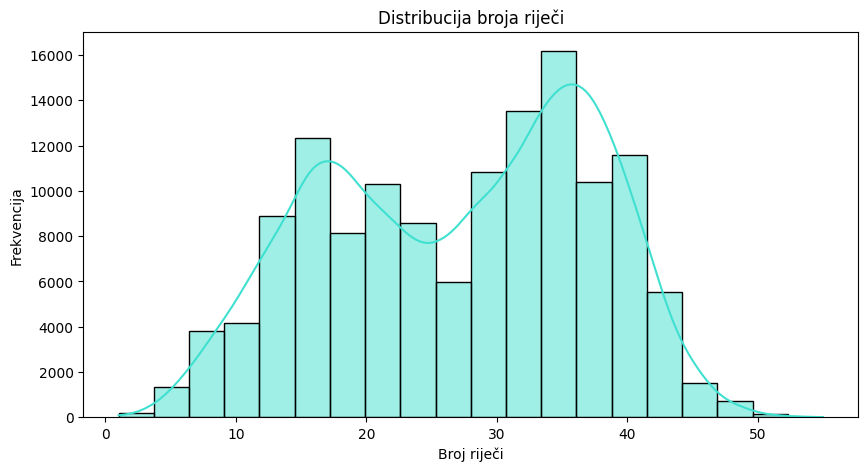

: 

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Word count'], bins=20, kde=True, color='turquoise')

plt.xlabel("Broj riječi")
plt.ylabel("Frekvencija")
plt.title("Distribucija broja riječi")


plt.show()

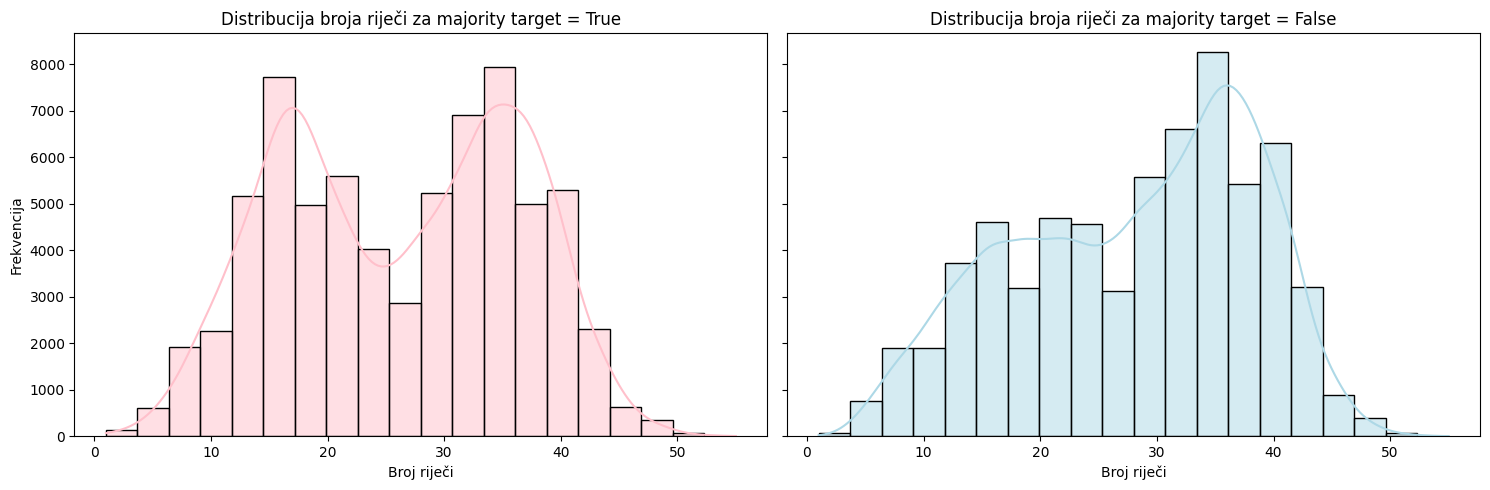

In [272]:

df_true = df[df['majority_target'] == True]
df_false = df[df['majority_target'] == False]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) 


sns.histplot(df_true['Word count'], bins=20, kde=True, color='pink', ax=axes[0])
axes[0].set_xlabel("Broj riječi")
axes[0].set_ylabel("Frekvencija")
axes[0].set_title("Distribucija broja riječi za majority target = True")

sns.histplot(df_false['Word count'], bins=20, kde=True, color='lightblue', ax=axes[1])
axes[1].set_xlabel("Broj riječi")
axes[1].set_ylabel("Frekvencija")
axes[1].set_title("Distribucija broja riječi za majority target = False")

plt.tight_layout()  
plt.show()


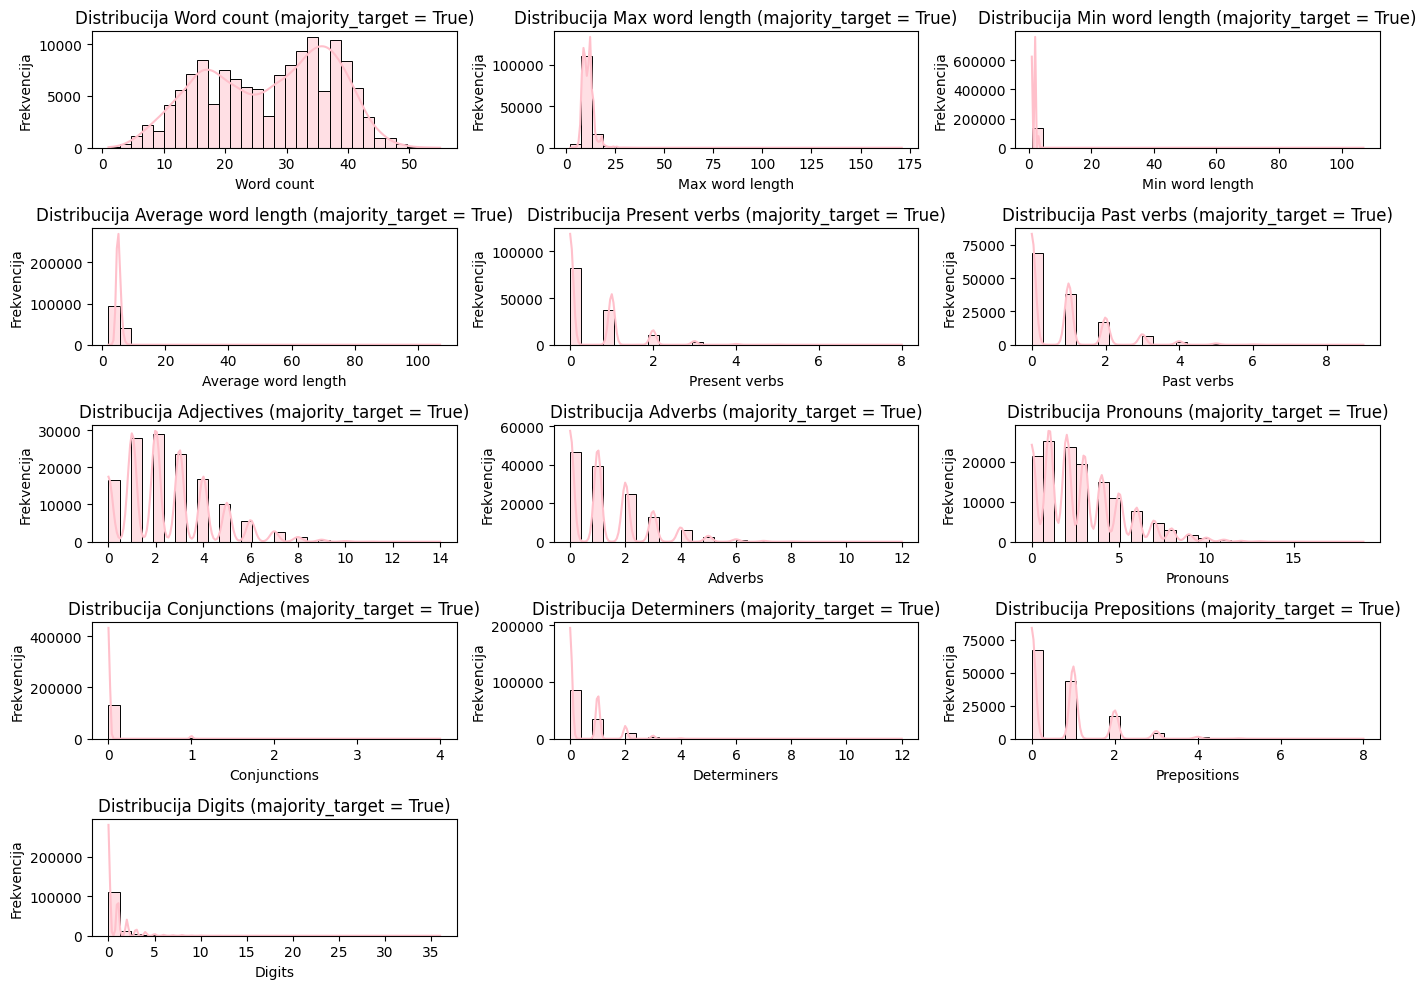

In [273]:

columns = ['Word count', 'Max word length', 'Min word length', 'Average word length',
           'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns', 
           'Conjunctions', 'Determiners', 'Prepositions', 'Digits']

plt.figure(figsize=(14, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='pink')
    plt.title(f"Distribucija {col} (majority_target = True)")
    plt.xlabel(col)
    plt.ylabel("Frekvencija")



plt.tight_layout()  
plt.show()


In [138]:
for col in columns:
    df[f'log_{col}'] = np.log1p(df[col])

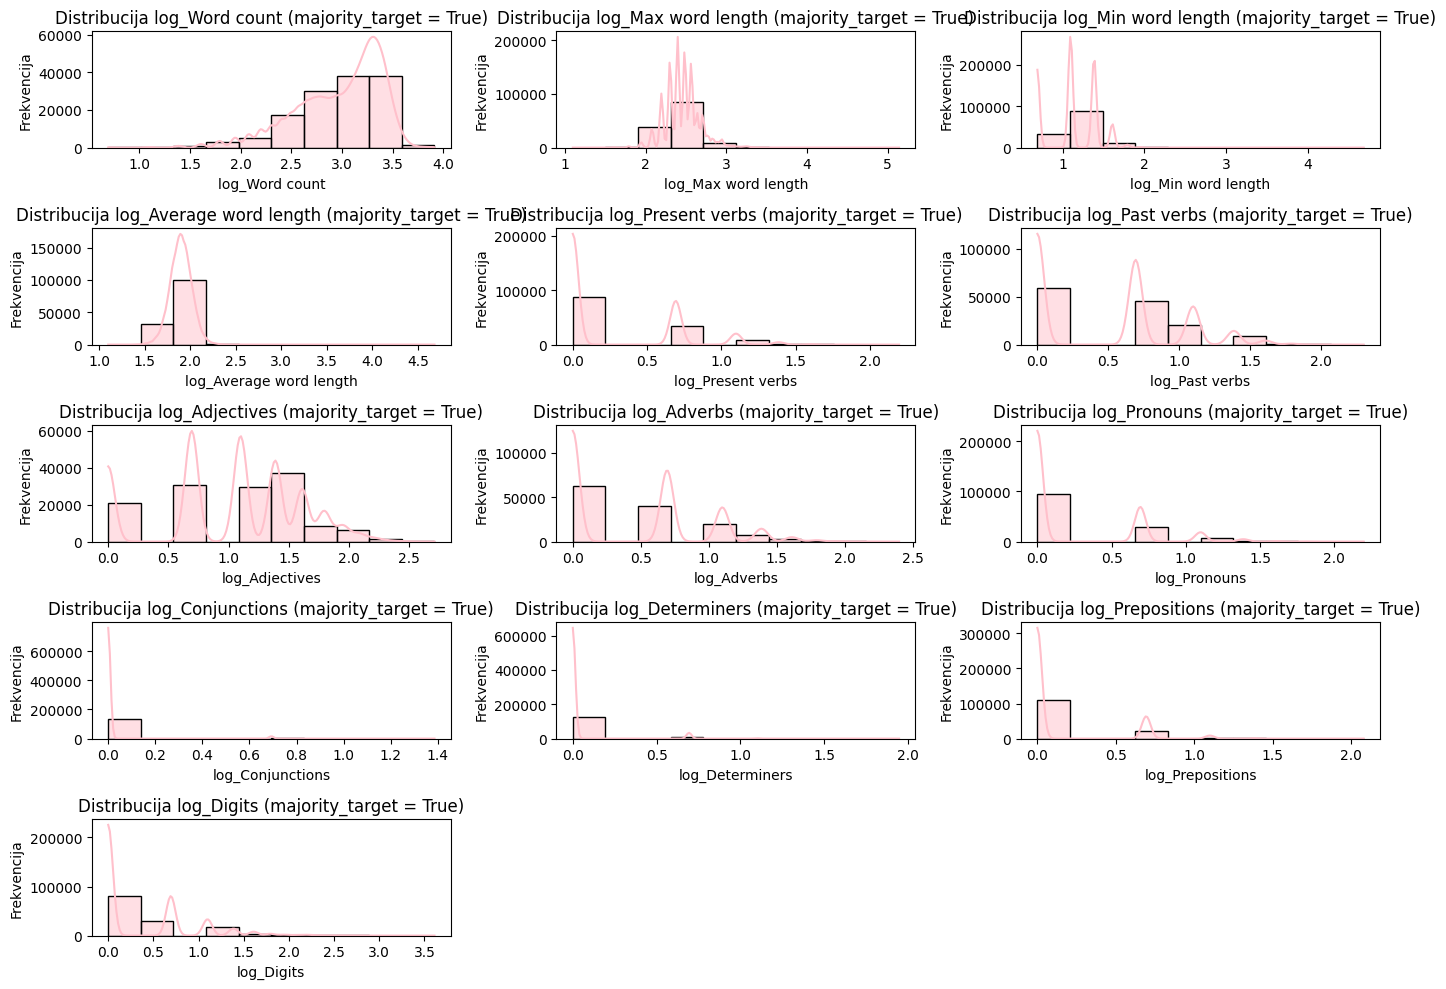

In [ ]:
log_columns = [f'log_{col}' for col in columns] 



plt.figure(figsize=(14, 10))

for i, col in enumerate(log_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=20, kde=True, color='pink')
    plt.title(f"Distribucija {col} (majority_target = True)")
    plt.xlabel(col)
    plt.ylabel("Frekvencija")



plt.tight_layout()  
plt.show()



# Empath

In [274]:
lexicon = Empath()


empath_scores= []


for i, tweet in enumerate(df['tweet_new']):
    try:
        empath_result = lexicon.analyze(tweet, normalize=True)
        empath_scores.append({'tweet_new': tweet, 'empath_result': empath_result})
    except Exception as e:
        print(f"An error occurred for tweet {i}: {e}")

df_empath_2 = pd.json_normalize(empath_scores)

In [275]:
df_empath_2.to_csv("df_empath_final.csv")